# 2. Exploratory analysis and data wrangling

In [1]:
import datetime
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import relativedelta

**Read in data set from csv file, converting all fields to str**

In [2]:
interest = pd.read_csv("Data for Cleaning & Modeling.csv",
                       low_memory=False,
                       converters=dict(zip(["X" + str(i) for i in range(1, 33)],
                                           [str] * 32)))
interest.shape

(400000, 32)

**We have one row whose values are missing but the target. It needs to be removed.**

In [3]:
print interest[364111:364112]
interest = interest[interest.index != 364111]
print interest.shape

           X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 ... X23 X24 X25 X26 X27 X28 X29 X30  \
364111  7.69%                             ...                                   

       X31 X32  
364111          

[1 rows x 32 columns]
(399999, 32)


## X1:Interest Rate on the loan (Target)

In [4]:
interest["X1"].head()

0    11.89%
1    10.71%
2    16.99%
3    13.11%
4    13.57%
Name: X1, dtype: object

**Convert to np.float and replace empty str with np.nan:**

In [5]:
interest["X1"] = interest["X1"].map(lambda x: np.float(x[:-1])/100
                                    if len(x) > 0 and x[-1] == "%" else np.nan)

**Remove rows where X1 values are missing:**

In [6]:
print "Total number of rows: %d" % interest.shape[0]
interest = interest[interest["X1"].notnull()]
print "Number of rows after removing missing values on X1: %d" % interest.shape[0]

Total number of rows: 399999
Number of rows after removing missing values on X1: 338989


**Histogram of target values(X1):**

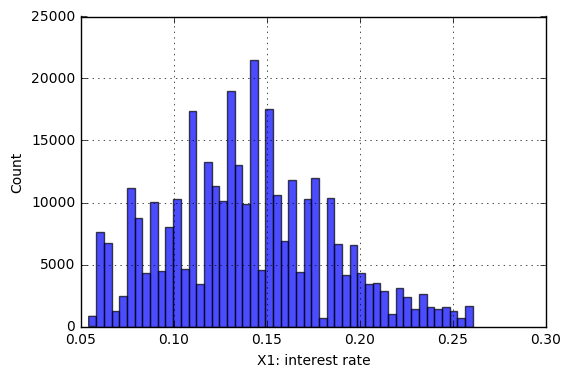

In [7]:
interest["X1"].hist(bins=50, alpha=0.7)
plt.xlabel("X1: interest rate")
plt.ylabel("Count")
plt.show()

## X2:A unique id for the loan.

## X3:A unique id assigned for the borrower.

In [8]:
print interest["X2"].head()
print interest["X3"].head()

0    54734
1    55742
2    57167
3    57245
4    57416
Name: X2, dtype: object
0     80364
1    114426
2    137225
3    138150
4    139635
Name: X3, dtype: object


In [9]:
print "Number of observations: %d" % interest.shape[0]
print "Number of unique values of X2: %d" % len(interest["X2"].unique())
print "Number of unique values of X3: %d" % len(interest["X3"].unique())

Number of observations: 338989
Number of unique values of X2: 338989
Number of unique values of X3: 338989


**Observation: Each row has a unique load ID and borrower ID**

## X4:Loan amount requested

In [10]:
interest["X4"].head()

0    $25,000
1     $7,000
2    $25,000
3     $1,200
4    $10,800
Name: X4, dtype: object

**Remove '$' and ','. Replace empty str with np.nan, and convert to np.float:**

In [11]:
interest["X4"] = interest["X4"].map(lambda x: np.float(x.replace("$", "").replace(",", ""))
                                    if len(x) > 0 else np.nan)

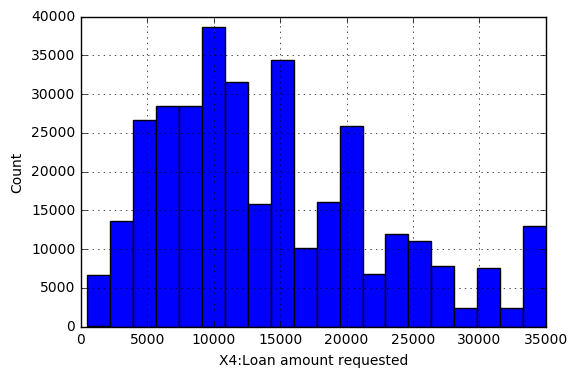

In [12]:
interest["X4"].hist(bins=20)
plt.xlabel("X4:Loan amount requested")
plt.ylabel("Count")
plt.show()

**Split X4 into 10 approximately equal-size bins, and see if the mean of each bin is correlated with X1:**

In [13]:
factor = pd.qcut(interest["X4"], 10)
mean = interest["X1"].groupby(factor).apply(np.mean)
count = interest["X1"].groupby(factor).apply(len)
df = pd.concat([mean, count], axis=1)
df.columns = ["mean", "count"]
df

,mean,count
X4,,
"[500, 5000]",0.138580,41234
"(5000, 7000]",0.129236,30045
"(7000, 9000]",0.130842,31989
"(9000, 10000]",0.131413,32516
"(10000, 12000]",0.135765,34987
"(12000, 15000]",0.136954,40542
"(15000, 18000]",0.142215,31873
"(18000, 20825]",0.142496,28006
"(20825, 26000]",0.144372,34500


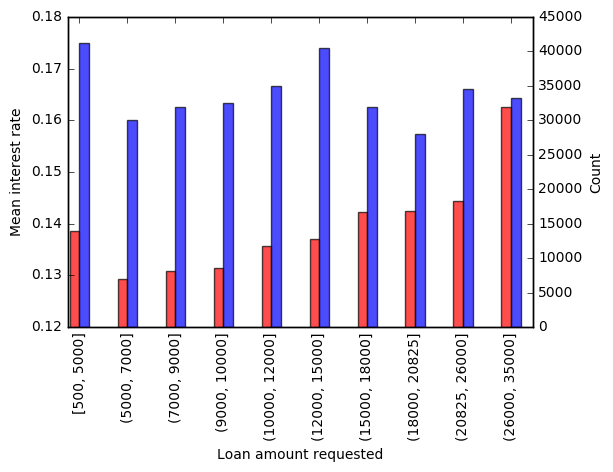

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2
df["mean"].plot(kind="bar", color="red", ax=ax, width=width, position=1, alpha=0.7)
df["count"].plot(kind="bar", color="blue", ax=ax2, width=width, position=0, alpha=0.7)
ax.set_ylabel("Mean interest rate")
ax.set_ylim([0.12, 0.18])
ax2.set_ylabel("Count")
ax2.set_ylim([0, 45000])
ax.set_xlabel("Loan amount requested")
plt.show()

**Observation: interest rate generally grows with the loan amount requested**

## X5:Loan amount funded

## X6:Investor-funded portion of loan

**Remove '$' and ','. Replace empty str with np.nan, and convert to np.float:**

In [15]:
interest["X5"] = interest["X5"].map(lambda x: np.float(x.replace("$", "").replace(",", ""))
                                    if len(x) > 0 else np.nan)
interest["X6"] = interest["X6"].map(lambda x: np.float(x.replace("$", "").replace(",", ""))
                                    if len(x) > 0 else np.nan)

print "corr(X4, X5) = %.4f" % interest["X4"].corr(interest["X5"])
print "corr(X4, X5) = %.4f" % interest["X4"].corr(interest["X6"])

corr(X4, X5) = 0.9983
corr(X4, X5) = 0.9944


**Observation: X5 and X6 appear to be highly correlated with X4 (loan amount requested)**

## X7:Number of payments (36 or 60)

In [16]:
interest["X7"].unique()

array([' 36 months', ' 60 months'], dtype=object)

**Plot distribution of interest rates grouped by X7 value (36 or 60)**

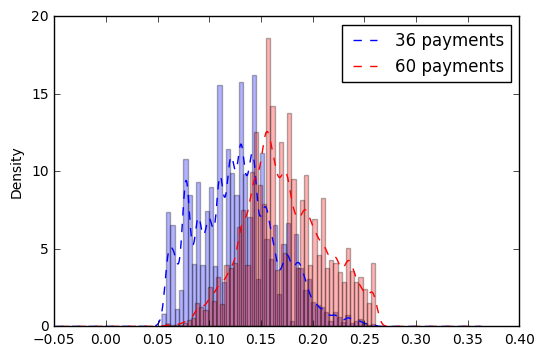

In [17]:
plt.figure()
plt.hold("on")
interest["X1"][interest["X7"]==" 36 months"].hist(bins=50, color="b", alpha=0.3, normed=True)
interest["X1"][interest["X7"]==" 36 months"].plot(kind="kde", style="b--")
interest["X1"][interest["X7"]==" 60 months"].hist(bins=50, color="r", alpha=0.3, normed=True)
interest["X1"][interest["X7"]==" 60 months"].plot(kind="kde", style="r--")
plt.legend(["36 payments", "60 payments"])
plt.show()

In [18]:
interest["X7"].value_counts()

 36 months    247791
 60 months     91198
Name: X7, dtype: int64

In [19]:
interest["X1"].groupby(interest["X7"]).apply(np.mean)

X7
 36 months    0.127340
 60 months    0.172402
Name: X1, dtype: float64

In [20]:
new_X7 = pd.get_dummies(interest["X7"], prefix="X7")
new_X7.head()

,X7_ 36 months,X7_ 60 months
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


**Observation: if you request 60 rather than 36 payments, you would end up with a higher rate**

## X8:Loan grade

In [21]:
interest["X8"].value_counts()

B    86121
C    76446
     51866
D    46984
A    45525
E    21628
F     8395
G     2024
Name: X8, dtype: int64

**Convert A, B, C, D, E, F, G into 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0:**

In [22]:
interest["X8"] = interest["X8"].map(lambda x: (ord(x)-ord("A")+1)
                                    if len(x) > 0 else np.nan)

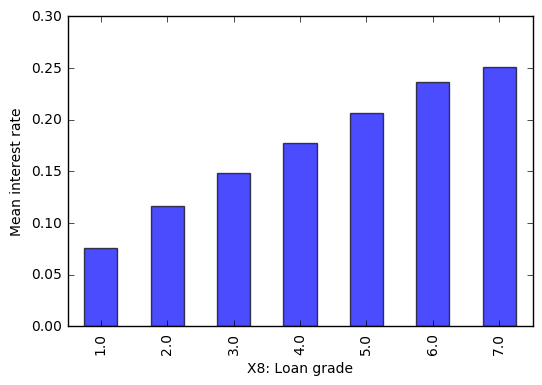

In [23]:
df = interest["X1"].groupby(interest["X8"]).apply(np.mean)
df.plot(kind="bar", alpha=0.7)
plt.xlabel("X8: Loan grade")
plt.ylabel("Mean interest rate")
plt.show()

## X9:Loan subgrade

In [24]:
interest["X9"].value_counts()

      51866
B3    20352
B4    19137
B2    16767
C1    16342
C2    16310
B5    15521
C3    15425
C4    14646
B1    14344
C5    13723
A5    13086
A4    11806
D1    11720
D2    10498
D3     9091
D4     8573
A3     7653
D5     7102
A2     6496
A1     6484
E1     5447
E2     5246
E3     4230
E4     3640
E5     3065
F1     2490
F2     1873
F3     1712
F4     1331
F5      989
G1      677
G2      511
G3      378
G4      252
G5      206
Name: X9, dtype: int64

**Convert A1 to G5 into 1.0 to 35.0:**

In [25]:
def subgrade2num(x):
    a = ord(x[0]) - ord("A") + 1
    b = int(x[1])
    return float((a - 1) * 5 + b)

interest["X9"] = interest["X9"].map(lambda x: subgrade2num(x) if len(x) > 0 else np.nan)

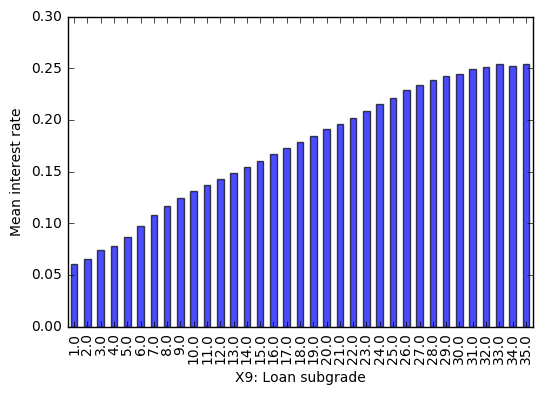

In [26]:
df = interest["X1"].groupby(interest["X9"]).apply(np.mean)
df.plot(kind="bar", alpha=0.7)
plt.xlabel("X9: Loan subgrade")
plt.ylabel("Mean interest rate")
plt.show()

**Observation: interest rate grows monotonically with subgrade (A1 highest and G5 lowest)**

## X11:Number of years employed (0 to 10; 10 = 10 or more)

In [27]:
interest["X11"].value_counts()

10+ years    108491
2 years       30117
3 years       26670
< 1 year      26003
5 years       23072
1 year        21432
4 years       20259
6 years       19601
7 years       19445
8 years       16212
n/a           14794
9 years       12893
Name: X11, dtype: int64

**Convert "X years" to np.float(X):**

In [28]:
interest["X11"] = interest["X11"].str.replace("< 1", "0")
interest["X11"] = interest["X11"].str.extract("(\d+)", expand=False)
interest["X11"] = interest["X11"].astype(np.float)

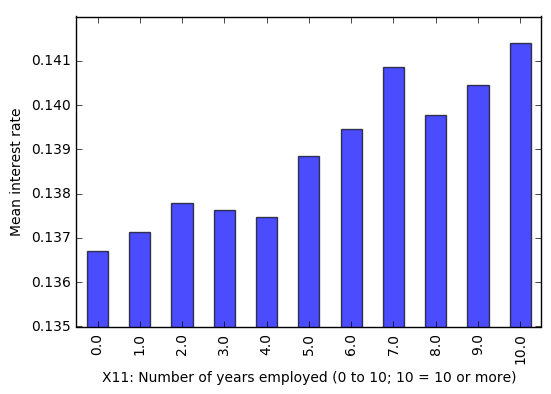

In [29]:
df = interest["X1"].groupby(interest["X11"]).apply(np.mean)
df.plot(kind="bar", alpha=0.7)
plt.ylim([0.135, 0.142])
plt.xlabel("X11: Number of years employed (0 to 10; 10 = 10 or more)")
plt.ylabel("Mean interest rate")
plt.show()

**Observation: interest rate grows with the number of years of employment**

## X12:"Home ownership status."

In [30]:
interest["X12"].value_counts()

MORTGAGE    145958
RENT        115958
             51959
OWN          24976
OTHER          107
NONE            30
ANY              1
Name: X12, dtype: int64

**Convert "OTHER", "NONE", "ANY" to empty str**

In [31]:
interest["X12"] = interest["X12"].map(lambda x: ""
                                      if x in set(["OTHER", "NONE", "ANY"]) else x)

In [32]:
interest["X12"].value_counts()

MORTGAGE    145958
RENT        115958
             52097
OWN          24976
Name: X12, dtype: int64

In [33]:
interest["X12"] = interest["X12"].map(lambda x: x if len(x) > 0 else np.nan)
df = interest["X1"].groupby(interest["X12"]).apply(np.mean)
df

X12
MORTGAGE    0.136630
OWN         0.140926
RENT        0.142537
Name: X1, dtype: float64

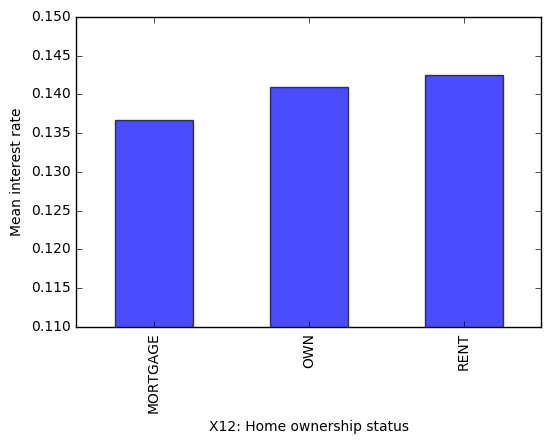

In [34]:
df.plot(kind="bar", alpha=0.7)
plt.ylim([0.11, 0.15])
plt.xlabel("X12: Home ownership status")
plt.ylabel("Mean interest rate")
plt.show()

In [35]:
new_X12 = pd.get_dummies(interest["X12"], prefix="X12")
new_X12.head()

,X12_MORTGAGE,X12_OWN,X12_RENT
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


## X13:Annual income of borrower

In [36]:
interest["X13"] = interest["X13"].map(lambda x: np.float(x) if len(x) > 0 else np.nan)

In [37]:
# split X13 into 10 approximately equal-size bins
factor = pd.qcut(interest["X13"], 10)
mean = interest["X1"].groupby(factor).apply(np.mean)
count = interest["X1"].groupby(factor).apply(len)
df = pd.concat([mean, count], axis=1)
df.columns = ["mean", "count"]
print df

                       mean  count
X13                               
[3000, 34000]      0.141310  29471
(34000, 42000]     0.141595  31866
(42000, 49000]     0.141521  24958
(49000, 55000]     0.140839  30543
(55000, 63000]     0.140288  28353
(63000, 71000]     0.140235  27674
(71000, 81000]     0.139964  28698
(81000, 95000]     0.137217  28280
(95000, 120000]    0.135918  30241
(120000, 7500000]  0.135460  27154


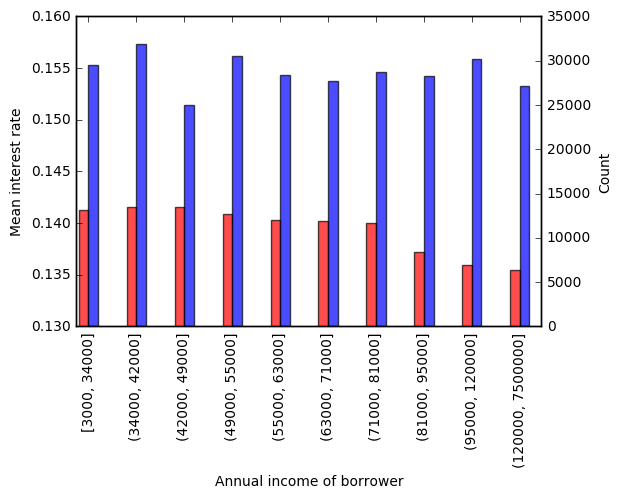

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2
df["mean"].plot(kind="bar", color="red", ax=ax, width=width, position=1, alpha=0.7)
df["count"].plot(kind="bar", color="blue", ax=ax2, width=width, position=0, alpha=0.7)
ax.set_ylabel("Mean interest rate")
ax.set_ylim([0.13, 0.16])
ax2.set_ylabel("Count")
ax.set_xlabel("Annual income of borrower")
plt.show()

## X14:"Income verified, not verified, or income source was verified"

In [39]:
interest["X14"].value_counts()

VERIFIED - income           127040
not verified                107873
VERIFIED - income source    104076
Name: X14, dtype: int64

In [40]:
interest["X14"] = interest["X14"].map(lambda x: x if len(x) > 0 else np.nan)
df = interest["X1"].groupby(interest["X14"]).apply(np.mean)
df

X14
VERIFIED - income           0.150064
VERIFIED - income source    0.141286
not verified                0.125219
Name: X1, dtype: float64

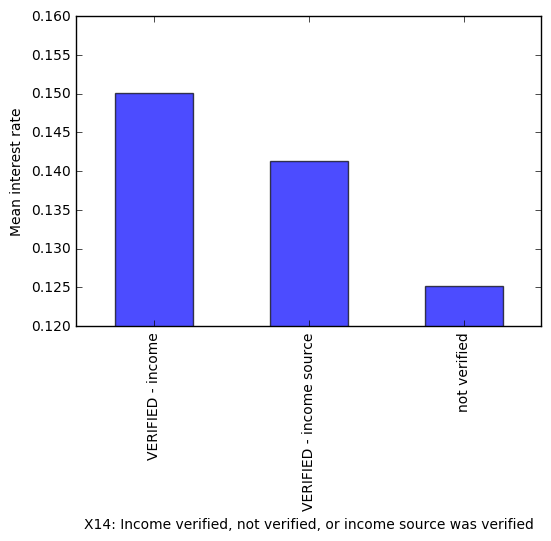

In [41]:
df.plot(kind="bar", alpha=0.7)
plt.ylim([0.12, 0.16])
plt.xlabel("X14: Income verified, not verified, or income source was verified")
plt.ylabel("Mean interest rate")
plt.show()

In [42]:
new_X14 = pd.get_dummies(interest["X14"], prefix="X14")
new_X14.head()

,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


## X15:Date loan was issued

**The dates are in the form of "MMM-YY"**

In [43]:
interest["X15"].unique()

array(['Aug-09', 'May-08', 'Aug-14', 'Mar-10', 'Nov-09', 'Aug-12',
       'Apr-08', 'Sep-09', 'Feb-10', 'Apr-10', 'Feb-09', 'Dec-08',
       'Aug-10', 'Jun-08', 'Oct-09', 'Mar-08', 'May-10', 'Jul-07',
       'Sep-07', 'Jun-07', 'Aug-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Nov-08', 'Jul-08', 'May-11', 'Dec-14',
       'Aug-08', 'Jan-09', 'Jul-10', 'Sep-08', 'Oct-08', 'Oct-13',
       'Jun-09', 'Jun-10', 'Mar-09', 'Feb-11', 'Dec-10', 'Jan-10',
       'Oct-14', 'Nov-10', 'Apr-09', 'May-09', 'Jan-13', 'Nov-14',
       'Dec-09', 'Jul-09', 'Jun-11', 'Jul-11', 'Jan-12', 'May-13',
       'Jun-12', 'Mar-11', 'Oct-10', 'Nov-11', 'Jan-14', 'Jan-11',
       'Sep-10', 'Apr-12', 'Feb-12', 'Jul-14', 'Apr-11', 'Sep-11',
       'Sep-14', 'Jul-12', 'Oct-11', 'Mar-13', 'Mar-12', 'Apr-14',
       'Jun-14', 'Aug-13', 'Aug-11', 'Nov-12', 'Sep-12', 'Dec-12',
       'Dec-11', 'Oct-12', 'Jun-13', 'Mar-14', 'Dec-13', 'May-12',
       'Sep-13', 'Feb-13', 'Feb-14', 'Nov-13', 'Apr-13', 'Jul-

**Project X15 to month, and see if correlated with X1:**

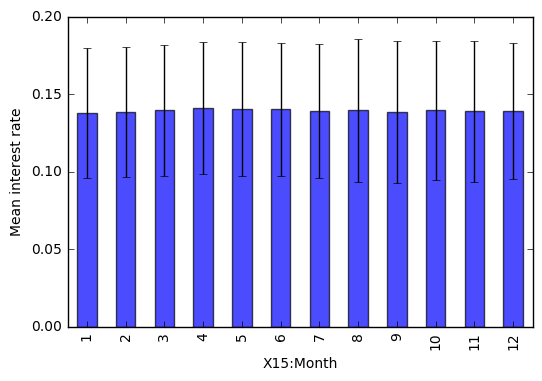

In [44]:
month_abbr = list(calendar.month_abbr)
# Convert month abbreviation MMM to int (1 to 12)
group_key = interest["X15"].map(lambda x: month_abbr.index(x.split("-")[0]))
std = interest["X1"].groupby(group_key).apply(np.std)
interest["X1"].groupby(group_key).apply(np.mean).plot(kind="bar", yerr=std, alpha=0.7)
plt.xlabel("X15:Month")
plt.ylabel("Mean interest rate")
plt.show()

**Project X15 to year, and see if correlated with X1:**

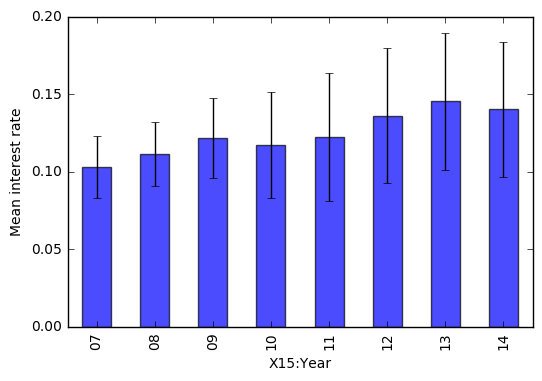

In [45]:
group_key = interest["X15"].map(lambda x: x.split("-")[1])
std = interest["X1"].groupby(group_key).apply(np.std)
interest["X1"].groupby(group_key).apply(np.mean).plot(kind="bar", yerr=std, alpha=0.7)
plt.xlabel("X15:Year")
plt.ylabel("Mean interest rate")
plt.show()

**Observation: interest rate (X1) grows from 2007 to 2014, but are pretty stable across months of a year**

In [46]:
interest["X15"] = interest["X15"].map(lambda x: np.float(x.split("-")[1]))

## X19:First 3 numbers of zip code

In [47]:
interest["X19"].head()

0    941xx
1    112xx
2    100xx
3    777xx
4    067xx
Name: X19, dtype: object

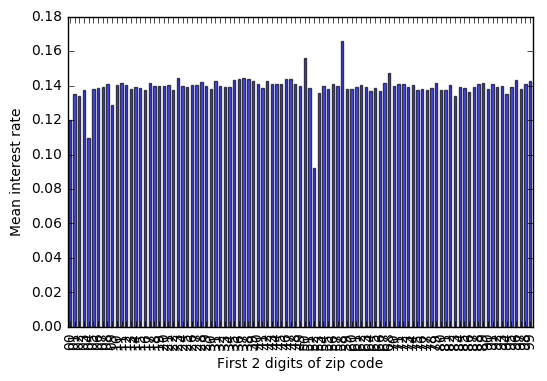

In [48]:
interest["X1"].groupby(interest["X19"].map(lambda x: x[:2])).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.xlabel("First 2 digits of zip code")
plt.ylabel("Mean interest rate")
plt.show()

**Observation: Except for a few outliers, zip code does not seem to correlate with interest rate**

## X20:State of borrower

In [49]:
interest["X20"].value_counts()[:5]

CA    52835
NY    29226
TX    26493
FL    22756
IL    13483
Name: X20, dtype: int64

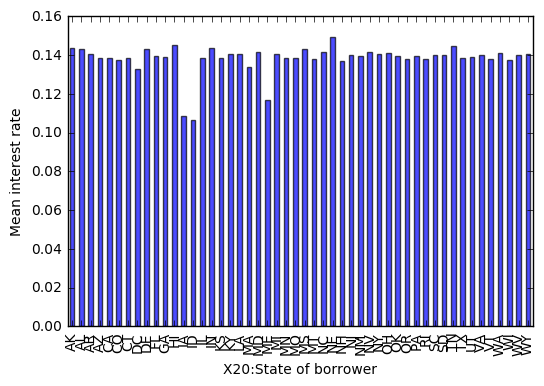

In [50]:
interest["X1"].groupby(interest["X20"].map(lambda x: x[:2])).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.xlabel("X20:State of borrower")
plt.ylabel("Mean interest rate")
plt.show()

**IA, ID and ME seem to be outliers, but this is likely due to sparsity of data:**

**States with fewest counts:**

In [51]:
interest["X1"].groupby(interest["X20"].map(lambda x: x[:2])).apply(len).sort_values()[:10]

X20
ME      4
NE      6
IA      7
ID      8
VT    604
MS    707
SD    730
WY    853
DE    896
AK    947
Name: X1, dtype: int64

## X21:"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income."

**Convert str into np.float, empty str into np.nan**

In [52]:
interest["X21"] = interest["X21"].map(lambda x: np.float(x) if len(x) > 0 else np.nan)

**Distribution of X21:**

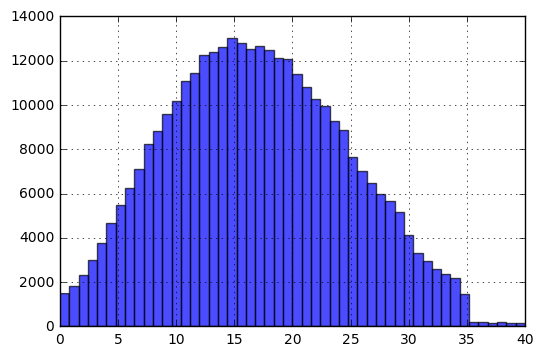

In [53]:
interest["X21"].hist(bins=50, alpha=0.7)
plt.show()

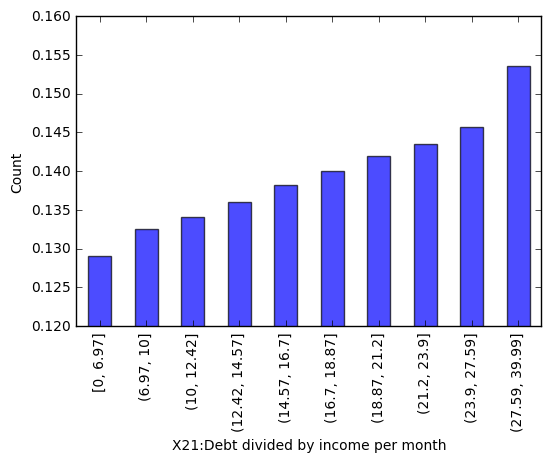

In [54]:
factor = pd.qcut(interest["X21"], 10)
interest["X1"].groupby(factor).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.xlabel("X21:Debt divided by income per month")
plt.ylabel("Count")
plt.ylim([0.12, 0.16])
plt.show()

**Observation: interest rate grows with the debt-to-income ratio**

## X22:The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [55]:
interest["X22"].value_counts()

0     280249
1      39796
2      11494
3       3964
4       1658
5        841
6        441
7        226
8        111
9         68
10        48
11        27
12        23
13        13
14         6
18         6
16         5
15         4
17         3
19         2
22         1
24         1
21         1
29         1
Name: X22, dtype: int64

**Convert X22 to np.float; np.nan if empty str**

In [56]:
interest["X22"] = interest["X22"].map(lambda x: np.float(x) if len(x) > 0 else np.nan)

**Mean interest rate grouped by X22:**

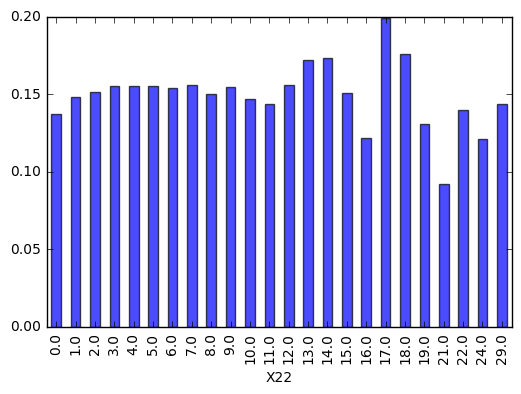

In [57]:
interest["X1"].groupby(interest["X22"]).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.show()

**Data with values > 8 have sparsity issues. Re-plot with those values removed:**

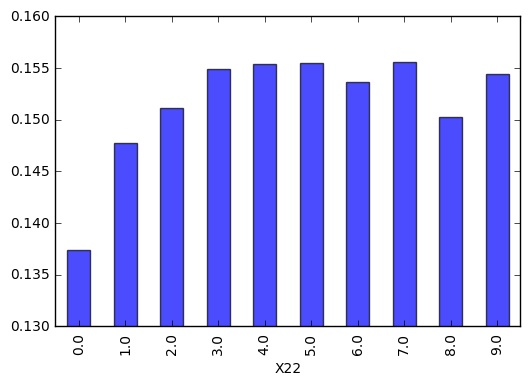

In [58]:
interest["X1"].groupby(interest["X22"]).apply(np.mean)[:9].plot(kind="bar", alpha=0.7)
plt.ylim([0.13, 0.16])
plt.show()

**Observation: interest rate grows with number of past-due delinquencies, but plateaus when > 5**

## X23:Date the borrower's earliest reported credit line was opened

In [59]:
interest["X23"].head()

0    Feb-94
1    Oct-00
2    Jun-00
3    Jan-85
4    Dec-96
Name: X23, dtype: object

**Data are in the form of "MMM-YY". Convert to the number of months passed:**

In [60]:
def date2num(x):
    cols = x.split("-")
    year = int("20" + cols[1] if cols[1][0] in set(["0", "1"]) else "19" + cols[1])
    month = list(calendar.month_abbr).index(cols[0])
    day = 1
    d0 = datetime.datetime(2016, 8, 1)
    d1 = datetime.datetime(year, month, day)
    delta = relativedelta.relativedelta(d0, d1)

    return delta.years * 12 + delta.months

interest["X23"] = interest["X23"].map(lambda x: date2num(x) if len(x) > 0 else np.nan).astype(float)

**Distribution of X23:**

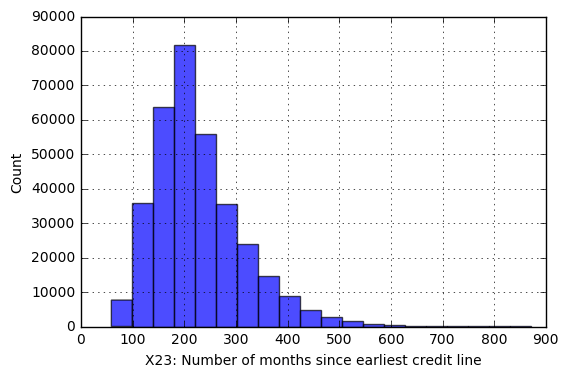

In [61]:
interest["X23"].hist(bins=20, alpha=0.7)
plt.xlabel("X23: Number of months since earliest credit line")
plt.ylabel("Count")
plt.show()

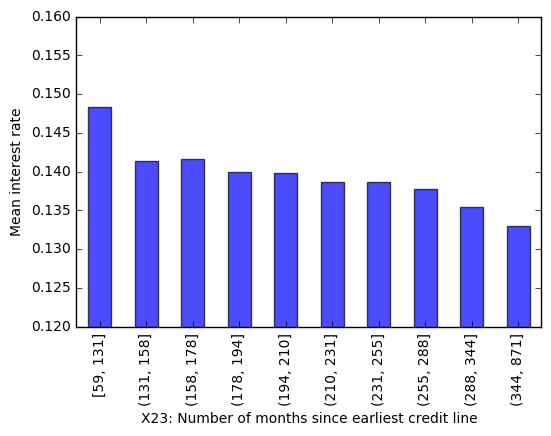

In [62]:
factor = pd.qcut(interest["X23"], 10)
interest["X1"].groupby(factor).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.xlabel("X23: Number of months since earliest credit line")
plt.ylabel("Mean interest rate")
plt.ylim([0.12, 0.16])
plt.show()

**Observation: People with longer credit history will get a lower rate**

## X24:Number of inquiries by creditors during the past 6 months.

**Convert X24 to np.float; np.nan if empty str**

In [63]:
interest["X24"] = interest["X24"].map(lambda x: np.float(x) if len(x) > 0 else np.nan)

In [64]:
interest["X24"].value_counts()

0.0    172066
1.0     95408
2.0     43969
3.0     19780
4.0      5134
5.0      1831
6.0       739
7.0        44
8.0        18
Name: X24, dtype: int64

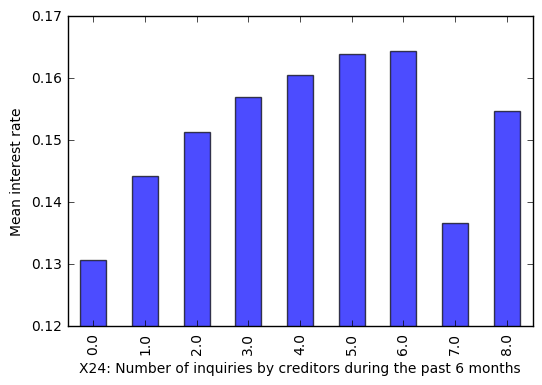

In [65]:
interest["X1"].groupby(interest["X24"]).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.xlabel("X24: Number of inquiries by creditors during the past 6 months")
plt.ylabel("Mean interest rate")
plt.ylim([0.12, 0.17])
plt.show()

**Observation: interest rate generally grows with X24. The bars on the right seem to be outliers because of data sparsity**

## X25:Number of months since the borrower's last delinquency.

In [66]:
interest["X25"].head()

0      
1      
2    41
3    64
4    58
Name: X25, dtype: object

**Convert to np.float; np.nan if empty str**

In [67]:
interest["X25"] = interest["X25"].map(lambda x: np.float(x) if len(x) > 0 else np.nan)

**Split X25 into 10 groups, plot mean of target value (interest rate) for each group:**

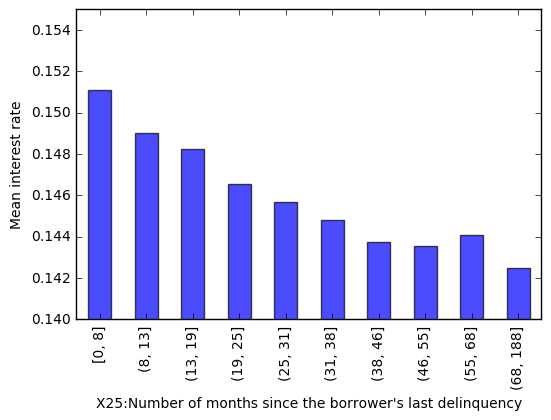

In [68]:
factor = pd.qcut(interest["X25"], 10)
interest["X1"].groupby(factor).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.xlabel("X25:Number of months since the borrower's last delinquency")
plt.ylabel("Mean interest rate")
plt.ylim([0.14, 0.155])
plt.show()

**Plot the mean of target value for each unique value of X25 (number of months since last delinquency):**

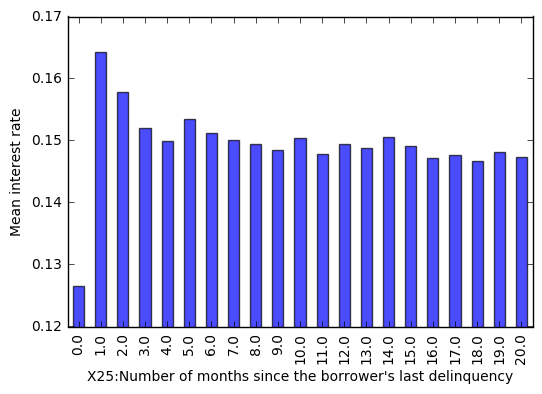

In [69]:
interest["X1"].groupby(interest["X25"]).apply(np.mean)[:20].plot(kind="bar", alpha=0.7)
plt.xlabel("X25:Number of months since the borrower's last delinquency")
plt.ylabel("Mean interest rate")
plt.ylim([0.12, 0.17])
plt.show()

**Observation: interest rate drops with the number of months since last delinquency, but we need to distinguish the case when X25=0 (no delinquency history)**

## X26:Number of months since the last public record

In [70]:
interest["X26"].unique()

array(['', '0', '63', '85', '97', '44', '61', '111', '117', '113', '114',
       '5', '103', '70', '47', '115', '78', '107', '88', '57', '90', '53',
       '87', '104', '68', '93', '89', '29', '108', '100', '129', '92',
       '39', '102', '31', '105', '56', '99', '91', '66', '94', '86', '112',
       '106', '96', '109', '72', '73', '120', '95', '79', '54', '67', '45',
       '118', '77', '110', '69', '18', '60', '76', '55', '62', '101', '30',
       '74', '25', '116', '98', '20', '58', '49', '64', '80', '23', '82',
       '42', '81', '40', '11', '17', '43', '27', '41', '71', '65', '75',
       '51', '22', '32', '6', '48', '36', '50', '34', '119', '52', '59',
       '7', '35', '21', '38', '13', '19', '46', '26', '37', '33', '12',
       '83', '15', '28', '1', '2', '9', '14', '84', '10', '4', '24', '8',
       '16', '3', '121'], dtype=object)

**Convert X26 to np.float; np.nan if empty str**

In [71]:
interest["X26"] = interest["X26"].map(lambda x: np.float(x) if len(x) > 0 else np.nan)

**Plot the mean of target value for each unique value of X26 (Number of months since the last public record):**

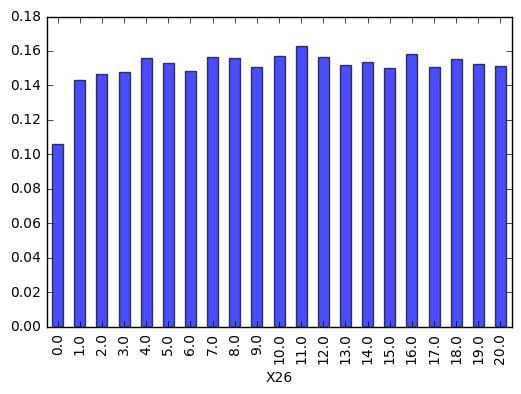

In [72]:
interest["X1"].groupby(interest["X26"]).apply(np.mean)[:20].plot(kind="bar", alpha=0.7)
plt.show()

**Plot the mean of target value for the two cases: X26 == 0 (True), X26 != 0 (False):**

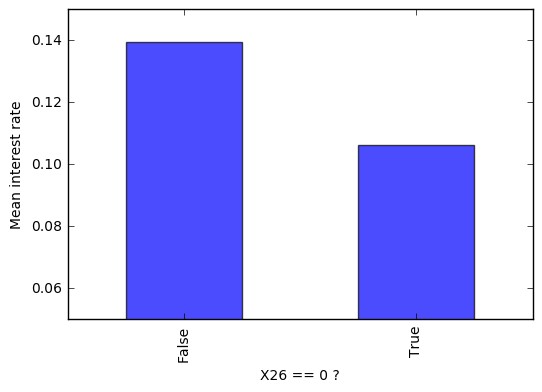

In [73]:
interest["X1"].groupby(interest["X26"] == 0.0).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.ylim([0.05, 0.15])
plt.xlabel("X26 == 0 ?")
plt.ylabel("Mean interest rate")
plt.show()

**Observation: It doesn't make much difference for cases where X26 > 0. So it can be converted into boolean value.**

## X27:Number of open credit lines in the borrower's credit file

In [74]:
interest["X27"].head()

0    10
1     7
2    10
3     5
4    14
Name: X27, dtype: object

**Convert X27 to np.float; np.nan if empty str**

In [75]:
interest["X27"] = interest["X27"].map(lambda x: np.float(x) if len(x) > 0 else np.nan)

In [76]:
mean = interest["X1"].groupby(interest["X27"]).apply(np.mean)
count = interest["X1"].groupby(interest["X27"]).apply(len)
df = pd.concat([mean, count], axis=1)
df.columns = ["mean", "count"]
df

,mean,count
X27,,
0.0,0.186817,6
1.0,0.168869,78
2.0,0.145832,1333
3.0,0.145898,3966
4.0,0.140628,9018
5.0,0.139092,15593
6.0,0.136899,22648
7.0,0.137758,27612
8.0,0.138493,30697


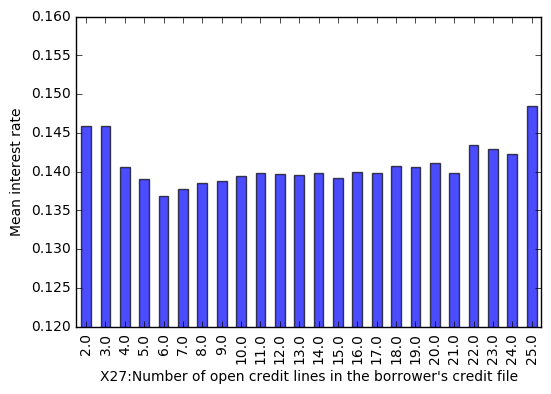

In [77]:
df["mean"][df["count"] > 1000].plot(kind="bar", alpha=0.7)
plt.ylim([0.12, 0.16])
plt.xlabel("X27:Number of open credit lines in the borrower's credit file")
plt.ylabel("Mean interest rate")
plt.show()

**Observation:X27 does not seem to correlate very much with X1**

## X28:Number of derogatory public records

**Convert X28 to np.float; np.nan if empty str**

In [78]:
interest["X28"] = interest["X28"].map(lambda x: np.float(x) if len(x) > 0 else np.nan)

In [79]:
interest["X28"].value_counts()

0.0     296229
1.0      37293
2.0       3668
3.0       1076
4.0        346
5.0        186
6.0         90
7.0         47
8.0         19
9.0         11
10.0        10
11.0         3
13.0         2
21.0         1
18.0         1
49.0         1
54.0         1
14.0         1
34.0         1
17.0         1
40.0         1
63.0         1
Name: X28, dtype: int64

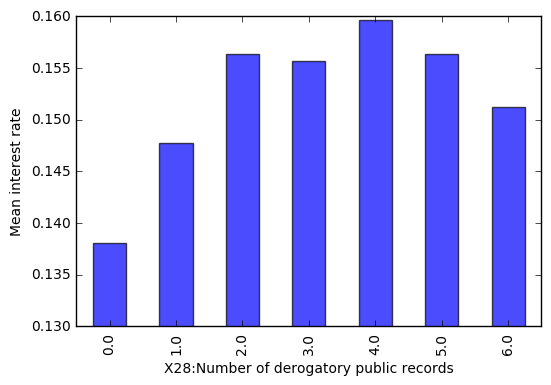

In [80]:
interest["X1"].groupby(interest["X28"]).apply(np.mean)[:6].plot(kind="bar", alpha=0.7)
plt.ylabel("Mean interest rate")
plt.xlabel("X28:Number of derogatory public records")
plt.ylim([0.13, 0.16])
plt.show()

**Observation: interest rate grows with X28 Number of derogatory public records, and plateaus when X28 > 4**

## X29:Total credit revolving balance

**Convert X29 to np.float; np.nan if empty str**

In [81]:
interest["X29"] = interest["X29"].map(lambda x: np.float(x) if len(x) > 0 else np.nan)

In [82]:
interest["X29"].value_counts().head()

0.0       1676
7429.0      34
6223.0      32
8476.0      32
8708.0      32
Name: X29, dtype: int64

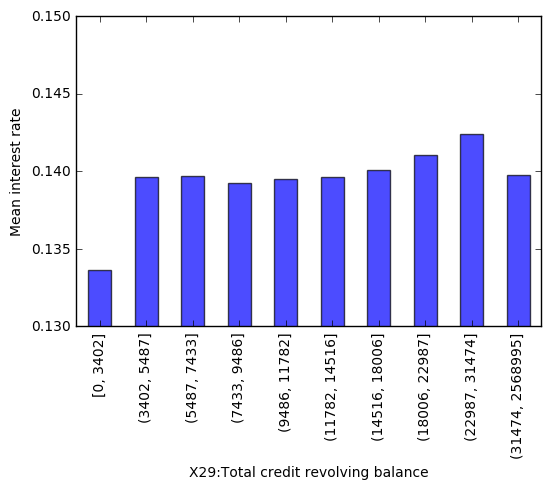

In [83]:
factor = pd.qcut(interest["X29"], 10)
interest["X1"].groupby(factor).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.xlabel("X29:Total credit revolving balance")
plt.ylabel("Mean interest rate")
plt.ylim([0.13, 0.15])
plt.show()

**Observation: It doesn't make much difference for cases where X29 > 0. So it can be converted into boolean value**

## X30:"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."

In [84]:
interest["X30"].head()[0]

'52.10%'

**Convert X30 to np.float and replace empty str with np.nan:**

In [85]:
interest["X30"] = interest["X30"].map(lambda x: np.float(x[:-1])/100 if len(x) > 0 and x[-1] == "%" else np.nan)

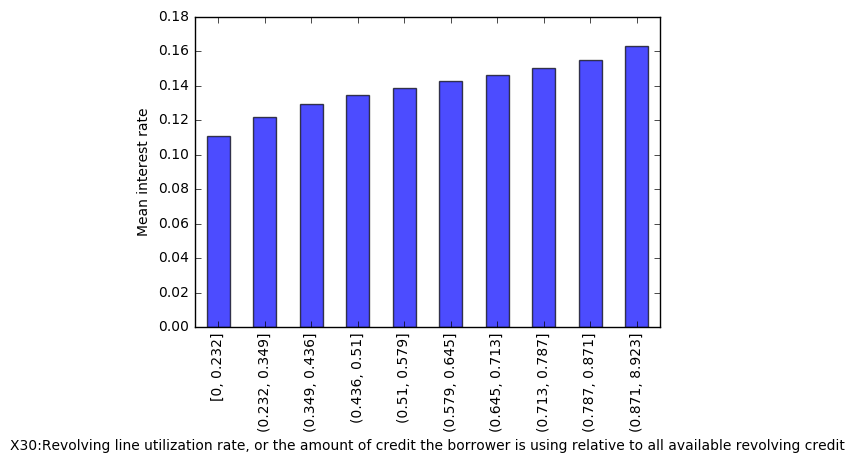

In [86]:
factor = pd.qcut(interest["X30"], 10)
interest["X1"].groupby(factor).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.xlabel("X30:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit")
plt.ylabel("Mean interest rate")
plt.show()

** Observation: interest rate grows with X30 (percentage of used credit)**

## X31:The total number of credit lines currently in the borrower's credit file

**Convert X31 to np.float; np.nan if empty str**

In [87]:
interest["X31"] = interest["X31"].map(lambda x: np.float(x) if len(x) > 0 else np.nan)

In [88]:
mean = interest["X1"].groupby(interest["X31"]).apply(np.mean)
count = interest["X1"].groupby(interest["X31"]).apply(len)
df = pd.concat([mean, count], axis=1)
df.tail(10)

,X1,X1
X31,,
93.0,0.182400,1
94.0,0.209900,1
97.0,0.156100,1
98.0,0.152200,1
99.0,0.212300,2
102.0,0.168350,2
105.0,0.168633,3
116.0,0.139800,1
117.0,0.209900,1


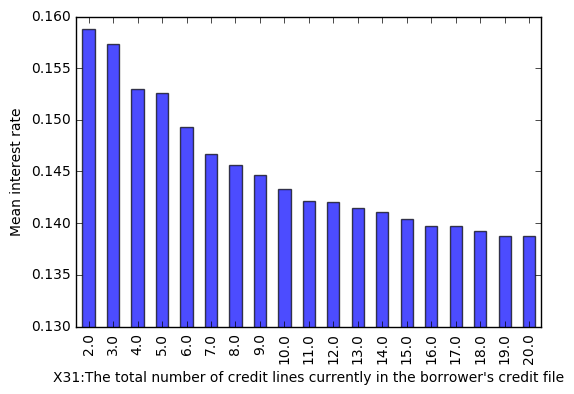

In [89]:
interest["X1"].groupby(interest["X31"]).apply(np.mean)[:20].plot(kind="bar", alpha=0.7)
plt.xlabel("X31:The total number of credit lines currently in the borrower's credit file")
plt.ylabel("Mean interest rate")
plt.ylim([0.13, 0.16])
plt.show()

**Observation: interest rate drops with the total number of credit lines**

## X32:The initial listing status of the loan. Possible values are – W, F

In [90]:
interest["X32"].value_counts()

f    232600
w    106389
Name: X32, dtype: int64

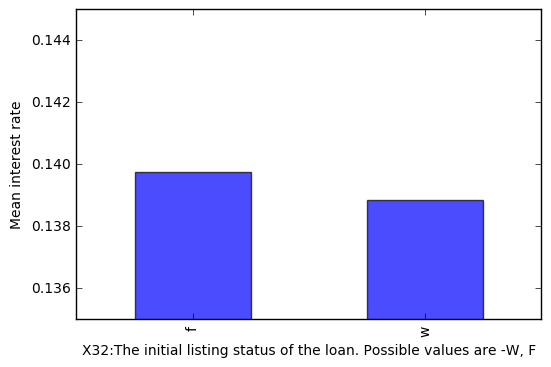

In [91]:
interest["X1"].groupby(interest["X32"]).apply(np.mean).plot(kind="bar", alpha=0.7)
plt.xlabel("X32:The initial listing status of the loan. Possible values are -W, F")
plt.ylabel("Mean interest rate")
plt.ylim([0.135, 0.145])
plt.show()

In [92]:
from scipy import stats
sample1 = interest["X1"][interest["X32"] == "f"].tolist()
sample2 = interest["X1"][interest["X32"] == "w"].tolist()
stats.ttest_ind(sample1,sample2)

Ttest_indResult(statistic=5.6648603152555026, pvalue=1.4726302571959286e-08)

**Observation:loan applications with X32="F" have a slightly higher (statistically significant, pval =1.4e-8, t-test) rate than X32="W"**

In [93]:
new_X32 = pd.get_dummies(interest["X32"], prefix="X32")
new_X32.head()

,X32_f,X32_w
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


**Drop columns that will not be used as features**

In [94]:
interest = interest.drop(["X2", "X3", "X7", "X10", "X12", "X14", "X16", "X17", "X18", "X19", "X20", "X32"], axis=1)

**Finally, add the columns whose values are transformed using one-hot encoding**

In [95]:
interest = pd.concat([interest, new_X7, new_X12, new_X14, new_X32], axis=1)

In [96]:
import pickle
pickle.dump(interest, open("interest.pickle", "w"))